In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/pii-detection-removal-from-educational-data/sample_submission.csv
/kaggle/input/pii-detection-removal-from-educational-data/train.json
/kaggle/input/pii-detection-removal-from-educational-data/test.json


![](https://pii-tools.com/wp-content/uploads/2022/05/data-deidentification-graphic.svg)https://pii-tools.com/pii-de-identification-vs-masking-vs-redaction/

In [ ]:


import pandas as pd
#df = pd.read_json('../input/cusersmarildownloadsdata-json/data.json', lines=True)
df = pd.read_json('../input/pii-detection-removal-from-educational-data/train.json', encoding = 'utf-8-sig')

In [3]:
df.to_json('new_file.json')

In [4]:
df.tail()

document                                          full_text  \
6802     22678  EXAMPLE – JOURNEY MAP\n\nTHE CHALLENGE    My w...   
6803     22679  Why Mind Mapping?\n\nMind maps are graphical r...   
6804     22681  Challenge\n\nSo, a few months back, I had chos...   
6805     22684  Brainstorming\n\nChallenge & Selection\n\nBrai...   
6806     22687  Mind Mapping\n\nChallenge\n\nMy consulting tea...   

                                                 tokens  \
6802  [EXAMPLE, –, JOURNEY, MAP, \n\n, THE, CHALLENG...   
6803  [Why, Mind, Mapping, ?, \n\n, Mind, maps, are,...   
6804  [Challenge, \n\n, So, ,, a, few, months, back,...   
6805  [Brainstorming, \n\n, Challenge, &, Selection,...   
6806  [Mind, Mapping, \n\n, Challenge, \n\n, My, con...   

                                    trailing_whitespace  \
6802  [True, True, True, False, False, True, True, F...   
6803  [True, True, False, False, False, True, True, ...   
6804  [False, False, False, True, True, True, True, ...   
6805  [False, False, True, True, False, False, True,...   
6806  [True, False, False, False, False, True, True,...   

                                                 labels  
6802  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6803  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6804  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6805  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6806  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...

#No Missing Values

In [5]:
df.isnull().sum()

document               0
full_text              0
tokens                 0
trailing_whitespace    0
labels                 0
dtype: int64

In [6]:
df['full_text'][2]

'Reporting process\n\nby Gilberto Gamboa\n\nChallenge\n\nI received a promotion of being the Regional Controller, along with my actual position of\n\nCountry CFO. The main responsibility of this new position was to weekly report the results\n\nfor the week and estimate the final results of the month of 4 countries and consolidated\n\nthose.\n\nWhen I was receiving the position, I went to visit my colleague, former Regional Controller,\n\nwho was promoted to Country CEO and now had interest conflicts of being the controller.\n\nThe process to consolidate the information of the 4 countries was that the country controllers\n\nsent him an email with the main figures for the week, he forwarded those to his country\n\naccountant who consolidated it, the accountant sent him the consolidated report and he\n\nfinally reported to the headquarters. The whole process took almost a full business day to\n\ncomplete.\n\nGiven that my responsibilities as Country CFO demanded more attention because my\

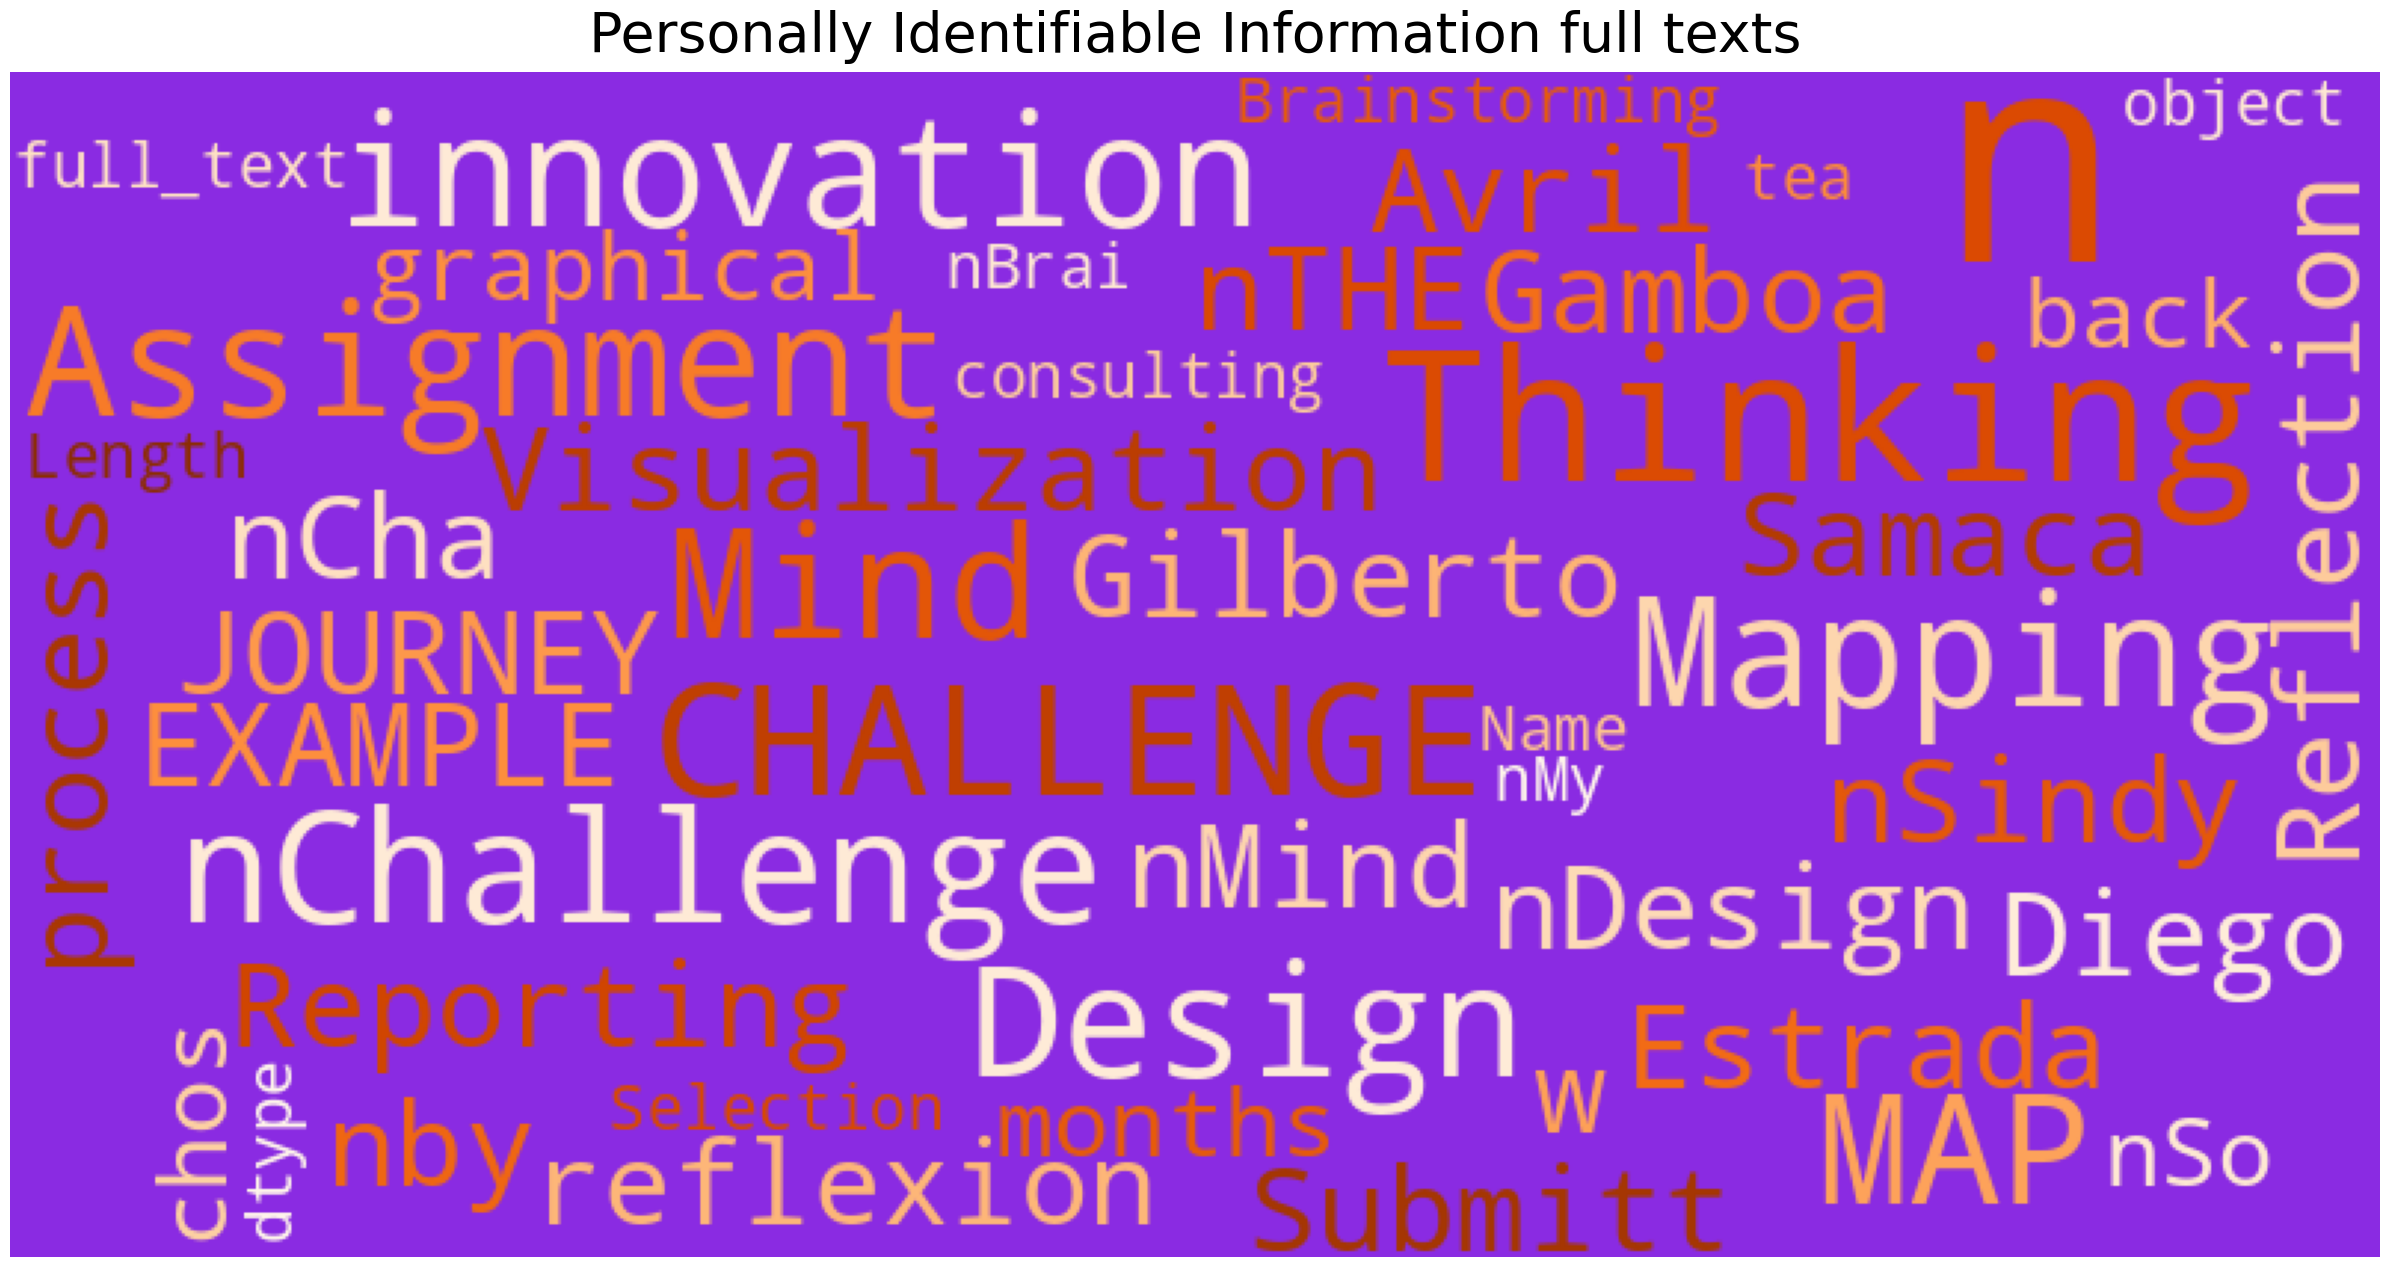

In [7]:
#By SRK https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

from wordcloud import WordCloud, STOPWORDS

# Thanks : https://www.kaggle.com/aashita/word-clouds-of-various-shapes ##
def plot_wordcloud(text, mask=None, max_words=200, max_font_size=100, figure_size=(24.0,16.0), 
                   title = None, title_size=40, image_color=False):
    stopwords = set(STOPWORDS)
    more_stopwords = {'one', 'br', 'Po', 'th', 'sayi', 'fo', 'Unknown'}
    stopwords = stopwords.union(more_stopwords)

    wordcloud = WordCloud(background_color='BlueViolet',
                    colormap = 'Oranges',      
                    stopwords = stopwords,
                    max_words = max_words,
                    max_font_size = max_font_size, 
                    random_state = 42,
                    width=800, 
                    height=400,
                    mask = mask)
    wordcloud.generate(str(text))
    
    plt.figure(figsize=figure_size)
    if image_color:
        image_colors = ImageColorGenerator(mask);
        plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear");
        plt.title(title, fontdict={'size': title_size,  
                                  'verticalalignment': 'bottom'})
    else:
        plt.imshow(wordcloud);
        plt.title(title, fontdict={'size': title_size, 'color': 'black', 
                                  'verticalalignment': 'bottom'})
    plt.axis('off');
    plt.tight_layout()  
    
plot_wordcloud(df["full_text"], title="Personally Identifiable Information full texts")

#Unigrams

In [8]:
#By SRK https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

from wordcloud import WordCloud, STOPWORDS

from plotly import tools

from collections import defaultdict
#train1_df = train_df[train_df["target"]==1]
#train0_df = train_df[train_df["target"]==0]

## custom function for ngram generation ##
def generate_ngrams(text, n_gram=1):
    token = [token for token in str(text).lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

## custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y=df["word"].values[::-1],
        x=df["wordcount"].values[::-1],
        showlegend=False,
        orientation = 'h',
        marker=dict(
            color=color,
        ),
    )
    return trace

## Get the bar chart from sincere questions ##
freq_dict = defaultdict(int)
for sent in df["tokens"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'blue')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,
                          subplot_titles=["Frequent words of Tokens"]) 
                                         # "Frequent words of GPT Values"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
py.iplot(fig, filename='word-plots')

#Bigrams

In [9]:
#By SRK https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

freq_dict = defaultdict(int)
for sent in df["tokens"]:
    for word in generate_ngrams(sent,2):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'orange')

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04,horizontal_spacing=0.15,
                          subplot_titles=["Frequent bigrams of tokens"]) 
                                          #"Frequent bigrams of GPT values"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Bigram Count Plots")
py.iplot(fig, filename='word-plots')

#Trigrams

In [10]:
freq_dict = defaultdict(int)
for sent in df["tokens"]:
    for word in generate_ngrams(sent,3):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(50), 'green')


# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, vertical_spacing=0.04, horizontal_spacing=0.2,
                          subplot_titles=["Frequent trigrams of Tokenss"]) 
                                          #"Frequent trigrams of GPT Values"])
fig.append_trace(trace0, 1, 1)
#fig.append_trace(trace1, 1, 2)
fig['layout'].update(height=1200, width=1200, paper_bgcolor='rgb(233,233,233)', title="Trigram Count Plots")
py.iplot(fig, filename='word-plots')

#The Opposite that is expected, instead of De-Identification: I Identified Gilberto on the WordCloud

In [11]:
#By Simon Crase https://www.kaggle.com/code/weka511/sort-on-given-names/notebook

def extract_Gilberto(s):
    '''Split name into parts.'''
    parts = s.split(',')
    # Sometime there is a redundant comma, so discard empty names
    parts = [part for part in parts if len(part)>0]
    return parts[1] if len(parts)>1 else ''
    

df['Gilberto'] = df['full_text'].apply(extract_Gilberto)

# Make given name fhe first column
cols = df.columns.tolist()
cols = cols[-1:] + cols[:-1]
df = df[cols]

# Sort and export
df.sort_values(by=['Gilberto',
                   'full_text']).to_csv('Contexts sorted on Gilberto')

In [12]:
df.tail(3)

Gilberto  document  \
6804                                  a few months back     22681   
6805   even those  that might seem ridiculous. It is...     22684   
6806   specialized in analyzing business concerns an...     22687   

                                              full_text  \
6804  Challenge\n\nSo, a few months back, I had chos...   
6805  Brainstorming\n\nChallenge & Selection\n\nBrai...   
6806  Mind Mapping\n\nChallenge\n\nMy consulting tea...   

                                                 tokens  \
6804  [Challenge, \n\n, So, ,, a, few, months, back,...   
6805  [Brainstorming, \n\n, Challenge, &, Selection,...   
6806  [Mind, Mapping, \n\n, Challenge, \n\n, My, con...   

                                    trailing_whitespace  \
6804  [False, False, False, True, True, True, True, ...   
6805  [False, False, True, True, False, False, True,...   
6806  [True, False, False, False, False, True, True,...   

                                                 labels  
6804  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6805  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...  
6806  [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...

In [13]:
%env TOKENIZERS_PARALLELISM=false
!pip install --quiet keybert
print('pip install keybert complete')

env: TOKENIZERS_PARALLELISM=false
pip install keybert complete


In [14]:
#Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

df['Gilberto token count'] = df['Gilberto'].apply(func=lambda x: len(str(x).split()))
df['tokens token count'] = df['tokens'].apply(func=lambda x: len(str(x).split()))
df['trailing_whitespace token count'] = df['trailing_whitespace'].apply(func=lambda x: len(str(x).split()))

In [15]:
df.head(3)

Gilberto  document  \
0   Dessine-moi  l'intelligence. Paris: Les Éditi...         7   
1   a more customer centric approach was  needed....        10   
2   along with my actual position of\n\nCountry C...        16   

                                           full_text  \
0  Design Thinking for innovation reflexion-Avril...   
1  Diego Estrada\n\nDesign Thinking Assignment\n\...   
2  Reporting process\n\nby Gilberto Gamboa\n\nCha...   

                                              tokens  \
0  [Design, Thinking, for, innovation, reflexion,...   
1  [Diego, Estrada, \n\n, Design, Thinking, Assig...   
2  [Reporting, process, \n\n, by, Gilberto, Gambo...   

                                 trailing_whitespace  \
0  [True, True, True, True, False, False, True, F...   
1  [True, False, False, True, True, False, False,...   
2  [True, False, False, True, True, False, False,...   

                                              labels  Gilberto token count  \
0  [O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...                     6   
1  [B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...                    15   
2  [O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...                    44   

   tokens token count  trailing_whitespace token count  
0                 787                              753  
1                 590                              563  
2                 729                              729

In [16]:
#Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

from plotly.express import histogram
histogram(data_frame=df, x='tokens token count')

In [17]:
#Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

top_df = df[df['Gilberto'].isin(df['Gilberto'].value_counts().head(n=5).index.tolist())].copy()
top_df['Gilberto'].value_counts()

Gilberto
 or Visual Thinking    108
                        48
 however                14
 diagrams               13
 boundaries             10
Name: count, dtype: int64

#Change only (disclosure of) Gilberto

In [18]:
#Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

from arrow import now
from keybert import KeyBERT
from sklearn.feature_extraction.text import CountVectorizer

MAX_DF = 1.0
MIN_DF = 4
MODEL = 'all-MiniLM-L12-v2'
STOP_WORDS = 'english'

model_start = now()
model = KeyBERT(model=MODEL,)
model.max_seq_length = 4 * 1024
vectorizer = CountVectorizer(ngram_range=(1, 1), stop_words=STOP_WORDS, min_df=MIN_DF, max_df=MAX_DF, )
document_embeddings, word_embeddings = model.extract_embeddings(docs=top_df['Gilberto'].values.tolist(), vectorizer=vectorizer, )
print('embedding time: {}'.format(now() - model_start))
print('we have {} documents and {} words.'.format(len(document_embeddings), len(word_embeddings)))
keywords = model.extract_keywords(docs=top_df['Gilberto'].values.tolist(), top_n=1, stop_words=STOP_WORDS, vectorizer=vectorizer,
                                  doc_embeddings=document_embeddings, word_embeddings=word_embeddings, min_df=MIN_DF, )
print('model time: {}'.format(now() - model_start))
top_df['keyword'] = [keyword[0][0] if len(keyword) else '-none-' for keyword in keywords]

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/573 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

data_config.json:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/134M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

train_script.py:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

embedding time: 0:00:10.331118
we have 193 documents and 4 words.
model time: 0:00:10.439549


#Keep keyword. Don't change it

In [19]:
top_df['keyword'].value_counts().head(n=20)

keyword
thinking      108
-none-         62
diagrams       13
boundaries     10
Name: count, dtype: int64

#UMAP

In [20]:
#Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

import pandas as pd
from plotly.express import scatter
from umap import UMAP

umap_start = now()
umap_model = UMAP(n_components=2, random_state=2024, verbose=False, n_jobs=1)
top_df[['u0', 'u1']] = umap_model.fit_transform(X=document_embeddings)
top_df['short text'] = top_df['Gilberto'].apply(func=lambda x: ' '.join(x.split()[:20]) + '...')
IGNORE = {'-none-', }
scatter(data_frame=top_df[~top_df['keyword'].isin(IGNORE)], x='u0', y='u1', hover_name='short text',
        hover_data=['keyword', 'full_text', 'tokens'],
        color = 'full_text',
       ).show()
print('UMAP time: {}'.format(now() - umap_start))

UMAP time: 0:00:10.820921


#Work hard. Play hard. Kaggle harder! 

#Acknowledgements:

SRK https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-qiqc

Simon Crase https://www.kaggle.com/code/weka511/sort-on-given-names/notebook

Mike Delong https://www.kaggle.com/code/mikedelong/visualize-a-subset-with-umap-embeddings

mpwolke https://www.kaggle.com/code/mpwolke/i-feel-love-parsing-json

mpwolke https://www.kaggle.com/code/mpwolke/math-formulas-json-to-csv

mpwolke https://www.kaggle.com/code/mpwolke/split-video-games-13cols-3-utterances